In [113]:
import matplotlib.pyplot as plt
import numpy as np

In [114]:
f1 = 0.1
f2 = 0.25

c1 = 0.01
c2 = 0.01
ratio = 0.5
Nrr = 256 # jumlah data RR
magsf = 1.7 / Nrr 

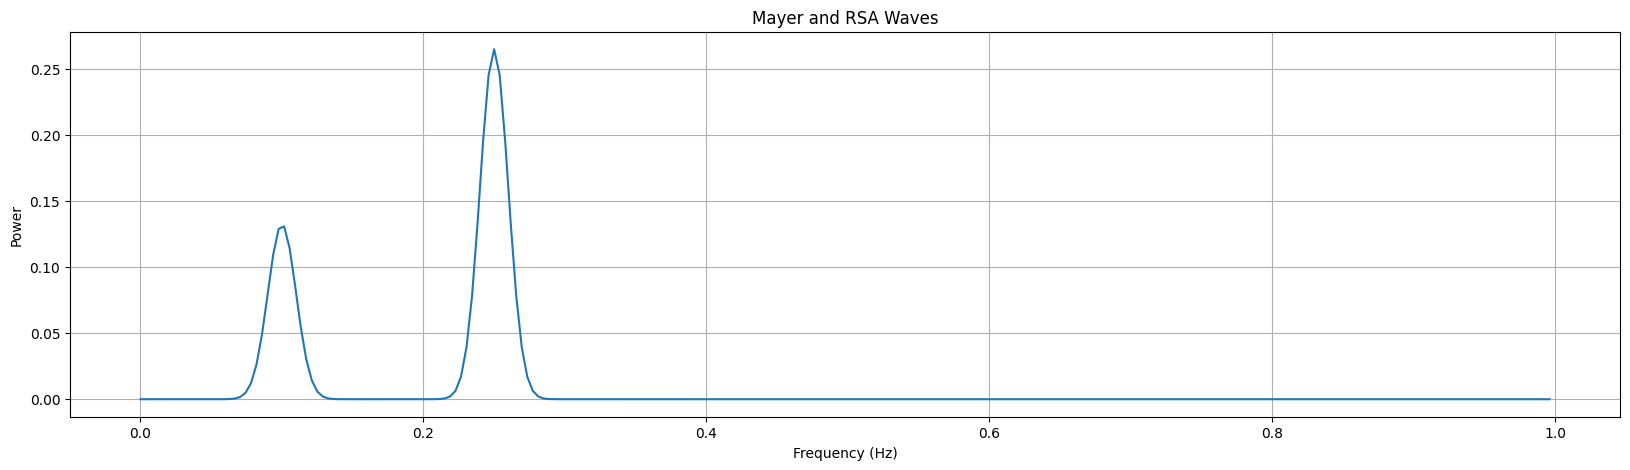

In [115]:
magsf = 1.7/Nrr

sf1 = np.zeros(Nrr)
sf2 = np.zeros(Nrr)
sf  = np.zeros(Nrr)
f = np.zeros(Nrr)

for i in range(Nrr):
    f[i] = i*1 /Nrr
    sf1[i] = ratio*magsf*np.exp(-(f[i]-f1)**2 / (2*c1**2)) / np.sqrt(2*np.pi*(c1**2))
    sf2[i] = magsf *np.exp(-(f[i]-f2)**2 / (2*c2**2)) / np.sqrt(2*np.pi*(c2**2))
    sf[i] = sf1[i] + sf2[i]


plt.figure(figsize=(20,5))
plt.grid()
plt.title("Mayer and RSA Waves")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.plot(f,sf)

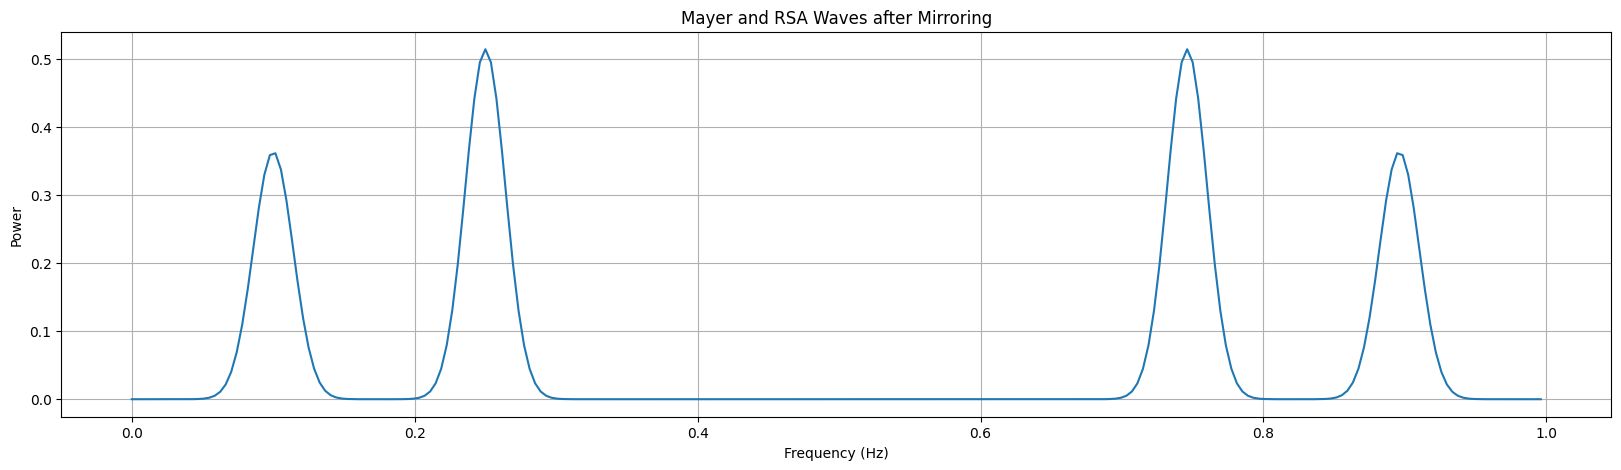

In [116]:
y =0
for i in range(Nrr-1,round(Nrr/2-1),-1):
    sf[i] = sf[y]
    y+=1
for i in range(Nrr):
    sf[i] = np.sqrt(sf[i])

plt.figure(figsize=(20,5))
plt.grid()
plt.title("Mayer and RSA Waves after Mirroring")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")    
plt.plot(f,sf)

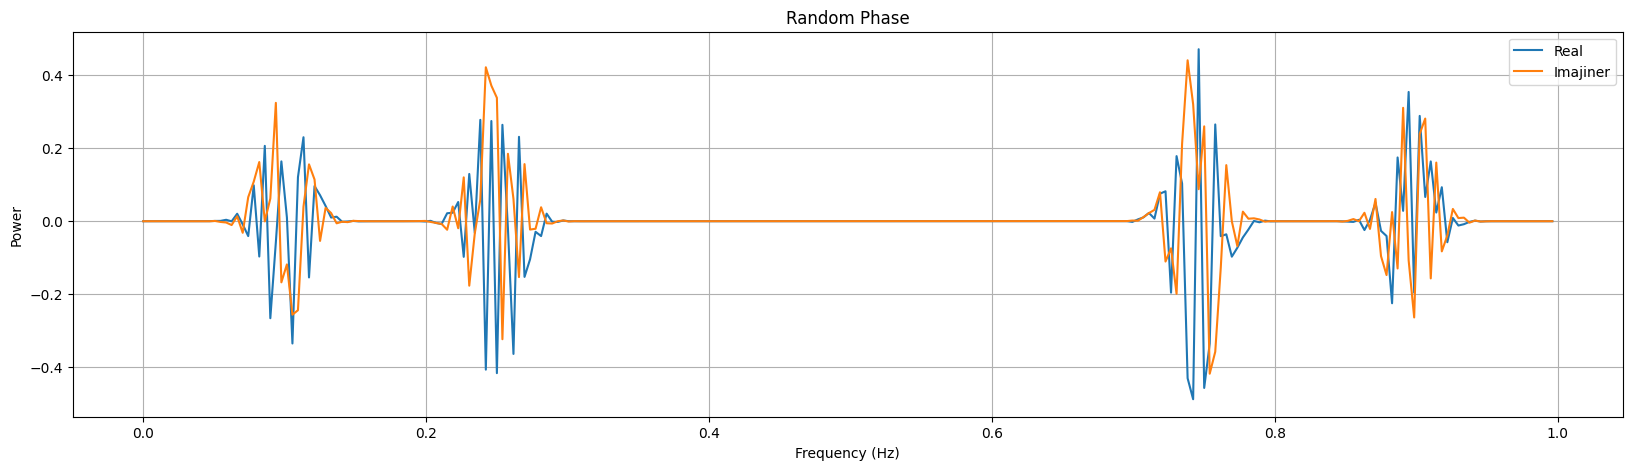

In [117]:
xreal = np.zeros(Nrr)
ximaj = np.zeros(Nrr)
for i in range(Nrr):
    xreal[i] = sf[i]*np.cos(np.pi*2*np.random.uniform(0,2*np.pi))
    ximaj[i] = sf[i]*np.sin(np.pi*2*np.random.uniform(0,2*np.pi))
plt.figure(figsize=(20,5))
plt.grid()
plt.title("Random Phase")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")   
plt.plot(f,xreal,label="Real")
plt.plot(f,ximaj,label="Imajiner")
plt.legend()


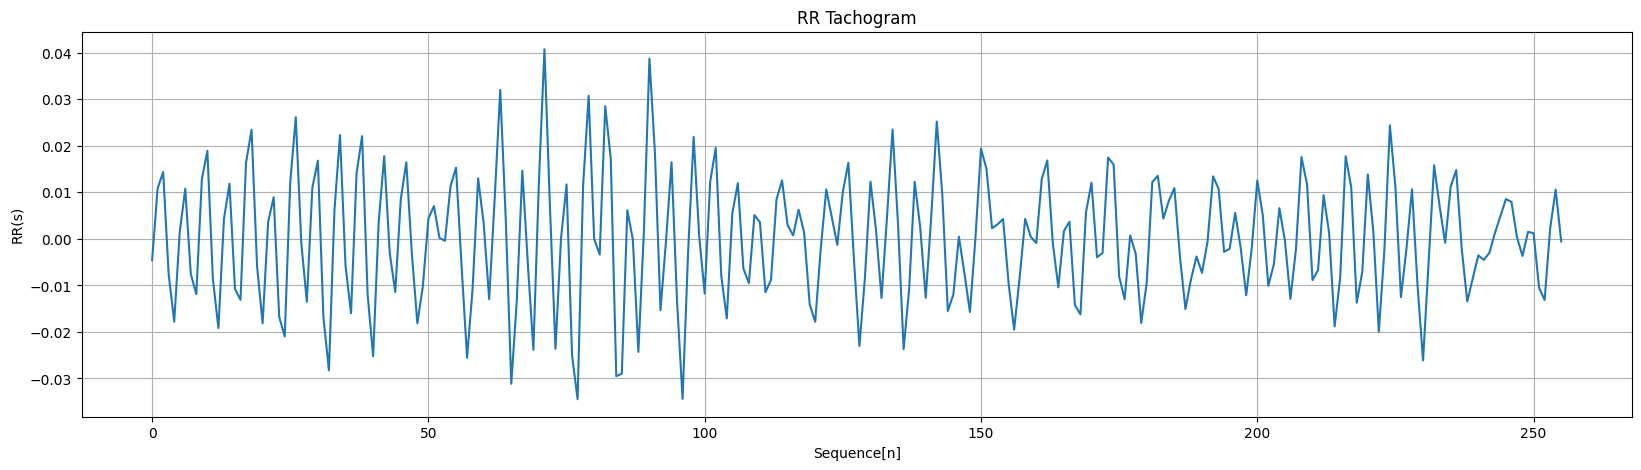

In [118]:
magidft = np.zeros(Nrr)
realidft = np.zeros(Nrr)
imajIdft = np.zeros(Nrr)
for n in range(Nrr):
    for k in range(Nrr):
        realidft[n] += xreal[k] * 2*np.cos(2*np.pi*k*n/Nrr)
        imajIdft[n] += ximaj[k] * 2*np.sin(2*np.pi*k*n/Nrr)
    magidft[n] = (realidft[n]+imajIdft[n])/Nrr 
k =  np.arange (0, Nrr, 1, dtype=int)

plt.figure(figsize=(20,5))
plt.title("RR Tachogram")
plt.xlabel("Sequence[n]")
plt.ylabel("RR(s)")
plt.plot(k,magidft)
plt.grid()

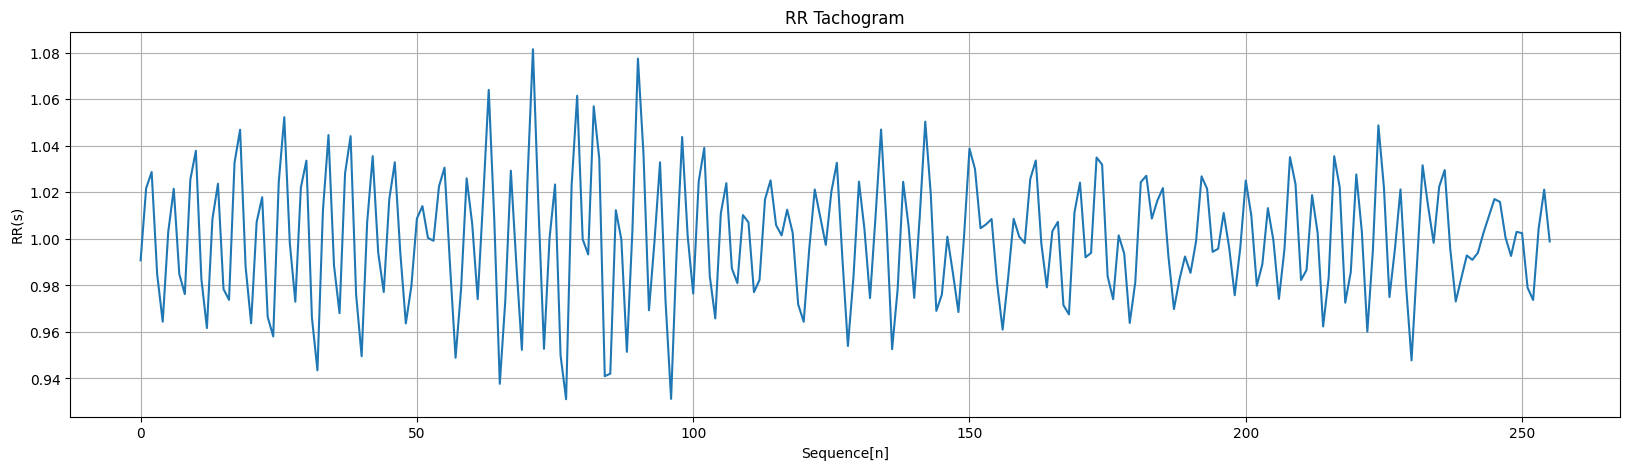

In [119]:
hrmean = 60
rrmean = 60/hrmean
scalling = 2
rr = np.zeros(Nrr)

for i in range(Nrr):
    rr[i] = rrmean + magidft[i] * scalling

plt.figure(figsize=(20,5))
plt.grid()
plt.title("RR Tachogram")
plt.xlabel("Sequence[n]")
plt.ylabel("RR(s)")
plt.plot(k,rr)

In [120]:
fecg = 256 #frekuensi ECG 
dt = 1/fecg # waktu dari frekuensi ecg
theta = np.zeros(6) # ada enam variabel dari P,Q,R,S,t^-, dan t^+
ai = np.zeros(6)
bi = np.zeros(6)
p = 0 
q = 1
r = 2 
s = 3
tm = 4
tp = 5

alph = np.sqrt(hrmean/60)

theta[p] = -60 
theta[q] = -15 
theta[r] = 0
theta[s] = 15
theta[tm] = (100*np.sqrt(alph)) - (3*np.sqrt(alph))
theta[tp] = (100*np.sqrt(alph)) 

#mengubah ke anguler 
for i in range(tp+1):
    theta[i] = theta[i] *np.pi/180

ai[p] = 0.8
ai[q] = -5
ai[r]= 30
ai[s]= -7.5
ai[tm]= 0.4 * (alph**2) *np.sqrt(alph)
ai[tp]= 0.56 * (alph**2) *np.sqrt(alph)

bi[p] = 0.2 * alph
bi[q] = 0.1* alph
bi[r]= 0.1* alph
bi[s]= 0.1* alph
bi[tm]= 0.4 / alph
bi[tp]= 0.2 * alph

In [121]:
def angguler(in1):
    i = int(np.floor(in1 / fecg))
    if rr[i]==0:
        rr[i] = 0.000000000000001
    return ((2*np.pi)/rr[round(in1)])

def modulus(in1,in2):
    while in1 > in2 :
        in1 = in1 - in2
    modulus = in1 
    return modulus

#the dynamical equations
def ddt(t0,x0,y0,z0,trig):
    a0 = 1 - np.sqrt((x0*x0)+(y0*y0))
    if trig == 1:
        return a0 * x0 - (angguler(t0)*y0)
    elif trig == 2 :
        return a0*y0 + (angguler(t0)*x0)
    elif trig == 3:
        temp =0
        zbase = 0.01*np.sin(2*np.pi*f2*t0) #base wander 
        te = np.arctan2(y0,x0) #theta
        for i in range(tp+1):
            det = (te-theta[i])%(2*np.pi) -np.pi
            det2 = det * det
            temp = temp - (ai[i] *det *np.exp((-det2)/(2*bi[i]*bi[i])))
        temp = temp 
        return temp
           

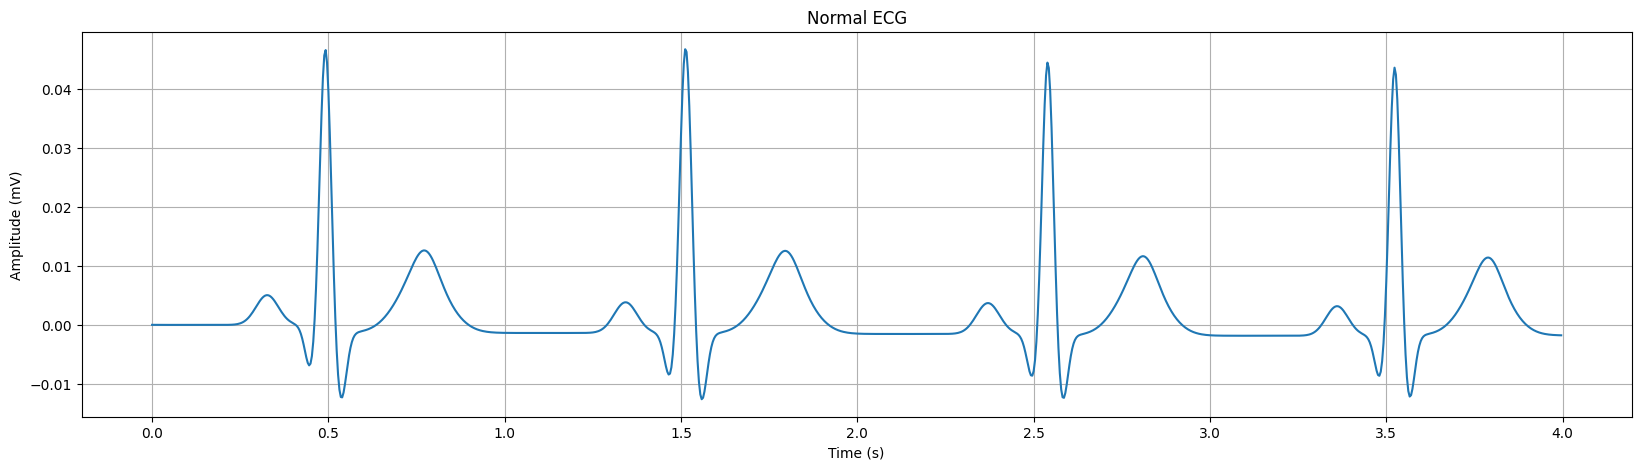

In [133]:
timev = 0.0
cycle = 4
yt = np.zeros(Nrr)
xt = np.zeros(Nrr)
zt = np.zeros(Nrr)
output = []
dt = 1/fecg
x = 0.1
y = 0
z = 0
for i in range(cycle):
    for j in range(Nrr):
        xt[j] = x
        yt[j] = y
        zt[j] = z
        #k1 
        k1x = ddt(timev,xt[j],yt[j],zt[j],1)
        k1y = ddt(timev,xt[j],yt[j],zt[j],2)
        k1z = ddt(timev,xt[j],yt[j],zt[j],3)
        #k2
        k2x = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),1)
        k2y = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),2)
        k2z = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),3)
        #k3
        k3x = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),1)
        k3y = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),2)
        k3z = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),3)
        #k4
        k4x = ddt(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),1)
        k4y = ddt(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),2)
        k4z = ddt(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),3)

        x += (dt/6) *(k1x+(2*k2x)+(2*k3x)+k4x)
        y += (dt/6) *(k1y+(2*k2y)+(2*k3y)+k4y)
        z += (dt/6) *(k1z+(2*k2z)+(2*k3z)+k4z)
        timev = timev + dt
        output.append(z)

plt.figure(figsize=(20, 5))
i = np.arange (0, len(output), 1)
plt.plot(i/fecg, output)
plt.title("Normal ECG")
plt.ylabel('Amplitude (mV)')
plt.xlabel('Time (s)')
plt.grid()
plt.show()


output = np.array(output) * 10e5 *0.01
output = np.round(output)
min = np.min(output)
output = np.array(output) - min
max = np.max(output)

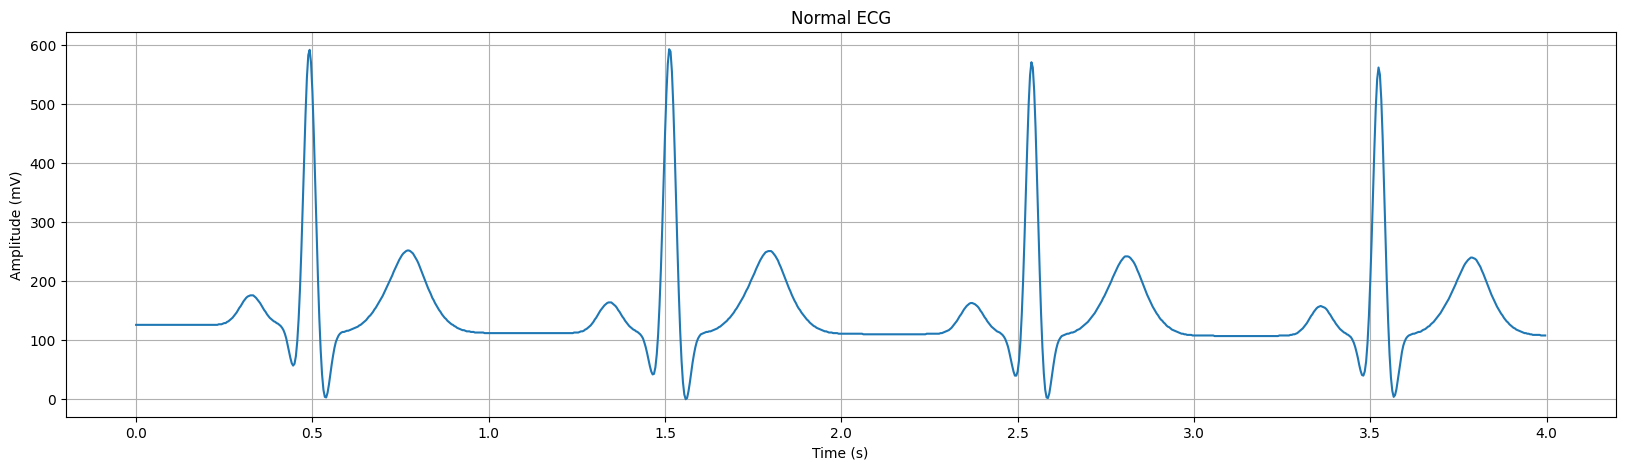

In [134]:

plt.figure(figsize=(20, 5))
i = np.arange (0, len(output), 1)
plt.plot(i/fecg, output)
plt.title("Normal ECG")
plt.ylabel('Amplitude (mV)')
plt.xlabel('Time (s)')
plt.grid()
plt.show()


In [136]:
import pandas as pd 
output = output[:300]
np.max(output)

592.0

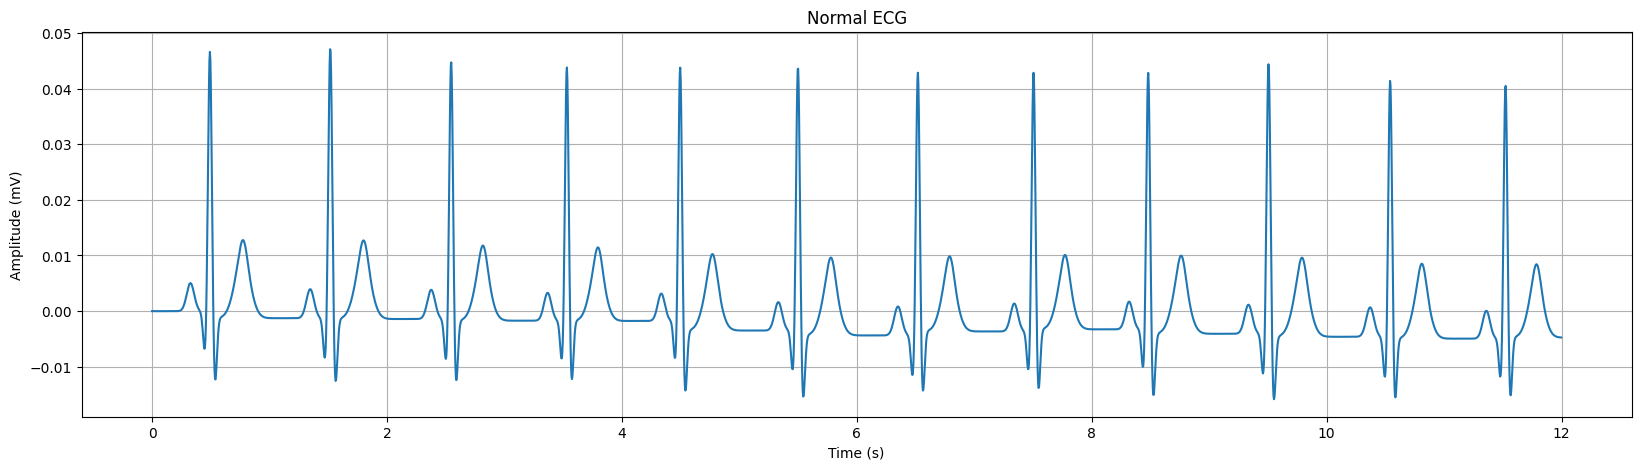

In [125]:
timev = 0.0
cycle = 12
yt = np.zeros(Nrr)
xt = np.zeros(Nrr)
zt = np.zeros(Nrr)
output = []
dt = 1/fecg
x = 0.1
y = 0
z = 0
for i in range(cycle):
    for j in range(Nrr):
        xt[j] = x
        yt[j] = y
        zt[j] = z
        #k1 
        k1x = ddt(timev,xt[j],yt[j],zt[j],1)
        k1y = ddt(timev,xt[j],yt[j],zt[j],2)
        k1z = ddt(timev,xt[j],yt[j],zt[j],3)
        #k2
        k2x = ddt(timev+(dt*0.5),xt[j] + (dt),yt[j]+(dt),zt[j]+(k1z*dt),1)
        k2y = ddt(timev+(dt*0.5),xt[j] + (dt),yt[j]+(dt),zt[j]+(k1z*dt),2)
        k2z = ddt(timev+(dt*0.5),xt[j] + (dt),yt[j]+(dt),zt[j]+(k1z*dt),3)
        
        x += dt*(0.5*k1x+0.5*k2x)
        y += dt*(0.5*k1y+0.5*k2y)
        z += dt*(0.5*k1z+0.5*k2z)
        timev = timev + dt
        output.append(z)

plt.figure(figsize=(20, 5))
i = np.arange (0, len(output), 1)
plt.plot(i/fecg, output)
plt.title("Normal ECG")
plt.ylabel('Amplitude (mV)')
plt.xlabel('Time (s)')
plt.grid()
plt.show()


In [126]:
thetaV = np.zeros(6) # ada enam variabel dari P,Q,R,S,t^-, dan t^+
aiV = np.zeros(6)
biV = np.zeros(6)
alph = np.sqrt(hrmean/60)

thetaV[p] = -100 
thetaV[q] = -100
thetaV[r] = -15
thetaV[s] = 50
thetaV[tm] = 95
thetaV[tp] = (100*np.sqrt(alph)) 

#mengubah ke anguler 
for i in range(tp+1):
    thetaV[i] = thetaV[i] *np.pi/180

aiV[p] = 0
aiV[q] = 0.1
aiV[r]= 2.8
aiV[s]= -0.1
aiV[tm]= -2.3 * (alph**2) *np.sqrt(alph)
aiV[tp]= -1.36 * (alph**2) *np.sqrt(alph)

biV[p] = 0.2 * alph
biV[q] = 0.2* alph
biV[r]= 0.4* alph
biV[s]= 0.2* alph
biV[tm]= 0.3 /alph
biV[tp]= 0.2 * alph

In [127]:
def ddtPVC(t0,x0,y0,z0,trig):
    a0 = 1 - np.sqrt((x0*x0)+(y0*y0))
    if trig == 1:
        return a0 * x0 - (angguler(t0)*y0)
    elif trig == 2 :
        return a0*y0 + (angguler(t0)*x0)
    elif trig == 3:
        temp =0
        zbase = 0.01*np.sin(2*np.pi*f2*t0) #base wander 
        te = np.arctan2(y0,x0) #theta
        for i in range(tp+1):
            det = (te-thetaV[i])%(2*np.pi) - np.pi
            det2 = det * det
            temp = temp - (aiV[i] *det *np.exp((-det2)/(2*biV[i]*biV[i])))
        temp = temp - (z0-zbase)
        return temp

In [128]:
timev = 0.0
cycle = 1
yt = np.zeros(Nrr)
xt = np.zeros(Nrr)
zt = np.zeros(Nrr)
output = []
dt = 1/fecg
x = 0.1
y = 0
z = 0
for i in range(cycle):
    for j in range(Nrr):
        xt[j] = x
        yt[j] = y
        zt[j] = z
        #k1 
        k1x = ddtPVC(timev,xt[j],yt[j],zt[j],1)
        k1y = ddtPVC(timev,xt[j],yt[j],zt[j],2)
        k1z = ddtPVC(timev,xt[j],yt[j],zt[j],3)
        #k2
        k2x = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),1)
        k2y = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),2)
        k2z = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),3)
        #k3
        k3x = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),1)
        k3y = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),2)
        k3z = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),3)
        #k4
        k4x = ddtPVC(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),1)
        k4y = ddtPVC(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),2)
        k4z = ddtPVC(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),3)

        x += (dt/6) *(k1x+(2*k2x)+(2*k3x)+k4x)
        y += (dt/6) *(k1y+(2*k2y)+(2*k3y)+k4y)
        z += (dt/6) *(k1z+(2*k2z)+(2*k3z)+k4z)
        timev = timev + dt
        output.append(z)



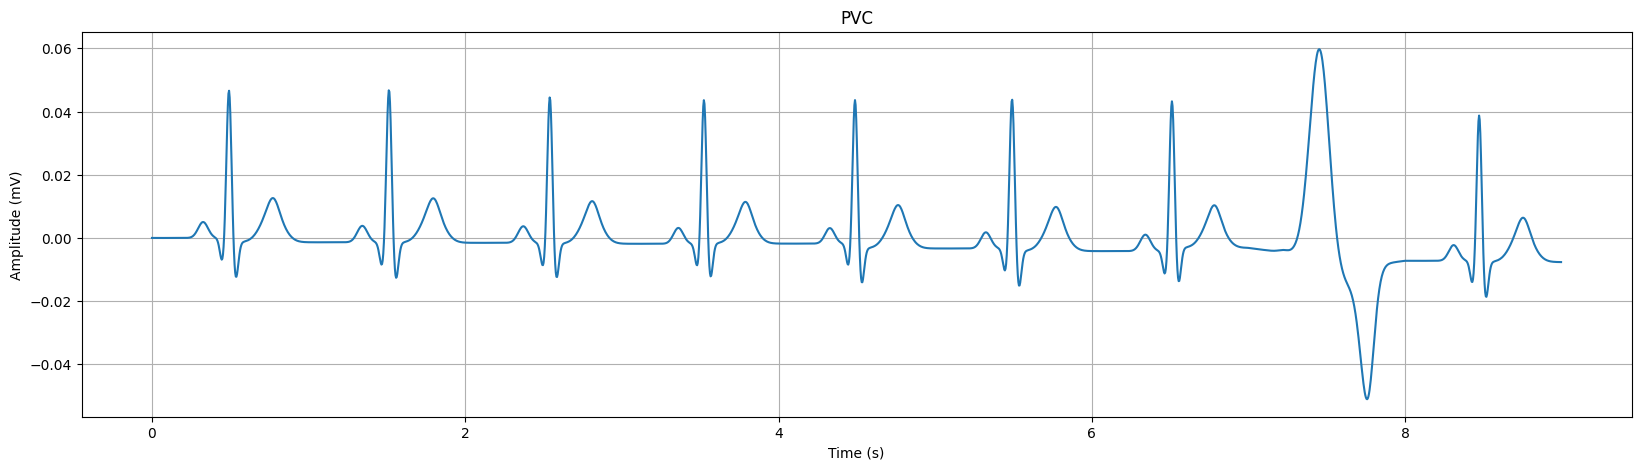

In [129]:
timev = 0.0
cycle = 9
yt = np.zeros(Nrr)
xt = np.zeros(Nrr)
zt = np.zeros(Nrr)
output = []
dt = 1/fecg
x = 0.1
y = 0
z = 0
randpvc = np.random.randint(0, high=cycle-1, dtype=int)
for i in range(cycle):
    if i == randpvc :
        for j in range(Nrr):
            xt[j] = x
            yt[j] = y
            zt[j] = z
            #k1 
            k1x = ddtPVC(timev,xt[j],yt[j],zt[j],1)
            k1y = ddtPVC(timev,xt[j],yt[j],zt[j],2)
            k1z = ddtPVC(timev,xt[j],yt[j],zt[j],3)
            #k2
            k2x = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),1)
            k2y = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),2)
            k2z = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),3)
            #k3
            k3x = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),1)
            k3y = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),2)
            k3z = ddtPVC(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),3)
            #k4
            k4x = ddtPVC(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),1)
            k4y = ddtPVC(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),2)
            k4z = ddtPVC(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),3)

            x += (dt/6) *(k1x+(2*k2x)+(2*k3x)+k4x)
            y += (dt/6) *(k1y+(2*k2y)+(2*k3y)+k4y)
            z += (dt/6) *(k1z+(2*k2z)+(2*k3z)+k4z)
            timev = timev + dt
            output.append(z)
    else :
        for j in range(Nrr):
            xt[j] = x
            yt[j] = y
            zt[j] = z
            #k1 
            k1x = ddt(timev,xt[j],yt[j],zt[j],1)
            k1y = ddt(timev,xt[j],yt[j],zt[j],2)
            k1z = ddt(timev,xt[j],yt[j],zt[j],3)
            #k2
            k2x = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),1)
            k2y = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),2)
            k2z = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k1x),yt[j]+(dt*0.5*k1y),zt[j]+(dt*0.5*k1z),3)
            #k3
            k3x = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),1)
            k3y = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),2)
            k3z = ddt(timev+(dt*0.5),xt[j] + (dt*0.5*k2x),yt[j]+(dt*0.5*k2y),zt[j]+(dt*0.5*k2z),3)
            #k4
            k4x = ddt(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),1)
            k4y = ddt(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),2)
            k4z = ddt(timev+dt,xt[j]+(k3x*dt),yt[j]+(k3y*dt),zt[j]+(k3z*dt),3)

            x += (dt/6) *(k1x+(2*k2x)+(2*k3x)+k4x)
            y += (dt/6) *(k1y+(2*k2y)+(2*k3y)+k4y)
            z += (dt/6) *(k1z+(2*k2z)+(2*k3z)+k4z)
            timev = timev + dt
            output.append(z)
 
        

plt.figure(figsize=(20, 5))
i = np.arange (0, len(output), 1)
plt.plot(i/fecg, output)
plt.title("PVC")
plt.ylabel('Amplitude (mV)')
plt.xlabel('Time (s)')
plt.grid()
plt.show()
